# Final Model Comparison & Ensemble

**Ziel:** Vergleich aller Modelle und Ensemble-Methoden

**Inhalte:**
1. Alle Ergebnisse laden
2. Umfassender Vergleich
3. Ensemble-Methoden
4. Horizont-Analyse
5. Finale Visualisierungen
6. Zusammenfassung & Empfehlungen

In [1]:
import sys
sys.path.append('../src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

from evaluation.metrics import calculate_metrics, print_metrics

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('Set2')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

print("✅ Libraries loaded")

✅ Libraries loaded


## 1. Alle Ergebnisse laden

In [2]:
DATA_TYPE = 'solar'
results_dir = Path('../results/metrics')

# Lade alle verfügbaren Ergebnisse
result_files = {
    'Baseline': f'{DATA_TYPE}_baseline_results.csv',
    'Statistical': f'{DATA_TYPE}_statistical_results.csv',
    'ML Trees': f'{DATA_TYPE}_ml_tree_results.csv',
    'Deep Learning': f'{DATA_TYPE}_deep_learning_results.csv',
    'Advanced': f'{DATA_TYPE}_advanced_results.csv'
}

all_results = {}

for category, filename in result_files.items():
    filepath = results_dir / filename
    if filepath.exists():
        df = pd.read_csv(filepath, index_col=0)
        all_results[category] = df
        print(f"✅ Loaded {category}: {len(df)} models")
    else:
        print(f"⚠️ {category} not found: {filename}")

print(f"\nTotal categories loaded: {len(all_results)}")

✅ Loaded Baseline: 5 models
✅ Loaded Statistical: 3 models
✅ Loaded ML Trees: 4 models
✅ Loaded Deep Learning: 3 models
✅ Loaded Advanced: 2 models

Total categories loaded: 5


## 2. Gesamtvergleich aller Modelle

In [3]:
# Kombiniere alle Ergebnisse
combined_results = pd.concat(all_results.values(), keys=all_results.keys())
combined_results.index = [f"{cat} - {model}" for cat, model in combined_results.index]

# Sortiere nach RMSE
combined_results_sorted = combined_results.sort_values('test_rmse')

print("=" * 100)
print("COMPLETE MODEL COMPARISON - ALL CATEGORIES")
print("=" * 100)
display(combined_results_sorted.round(2))

# Beste Modelle
print("\n" + "=" * 100)
print("TOP 5 MODELS")
print("=" * 100)
display(combined_results_sorted.head(5).round(2))

best_model = combined_results_sorted.index[0]
best_rmse = combined_results_sorted['test_rmse'].iloc[0]
print(f"\n🏆 Overall Best Model: {best_model}")
print(f"   RMSE: {best_rmse:.2f}")

COMPLETE MODEL COMPARISON - ALL CATEGORIES


,test_mae,test_rmse,test_mape,test_smape,test_r2,test_mase
Deep Learning - BiLSTM,0.07,0.10,60.95,21.63,0.98,0.82
Deep Learning - GRU,0.07,0.10,59.82,22.74,0.98,0.83
Deep Learning - LSTM,0.07,0.10,61.85,22.38,0.98,0.86
ML Trees - LightGBM,246.70,358.81,3.37,3.34,0.98,0.85
ML Trees - XGBoost,246.30,359.46,3.36,3.32,0.98,0.84
ML Trees - Random Forest,244.21,373.58,3.34,3.32,0.98,0.84
ML Trees - CatBoost,263.39,379.56,3.59,3.55,0.98,0.90
Statistical - SARIMA,2496.80,3186.03,44.94,30.49,-0.28,8.56
Baseline - Mean,2536.63,3259.70,46.12,30.83,-0.34,8.69
Baseline - Moving Average (168h),2898.03,3296.32,36.24,36.70,-0.37,9.93



TOP 5 MODELS


,test_mae,test_rmse,test_mape,test_smape,test_r2,test_mase
Deep Learning - BiLSTM,0.07,0.10,60.95,21.63,0.98,0.82
Deep Learning - GRU,0.07,0.10,59.82,22.74,0.98,0.83
Deep Learning - LSTM,0.07,0.10,61.85,22.38,0.98,0.86
ML Trees - LightGBM,246.70,358.81,3.37,3.34,0.98,0.85
ML Trees - XGBoost,246.30,359.46,3.36,3.32,0.98,0.84



🏆 Overall Best Model: Deep Learning - BiLSTM
   RMSE: 0.10


## 3. Visualisierung: RMSE Comparison

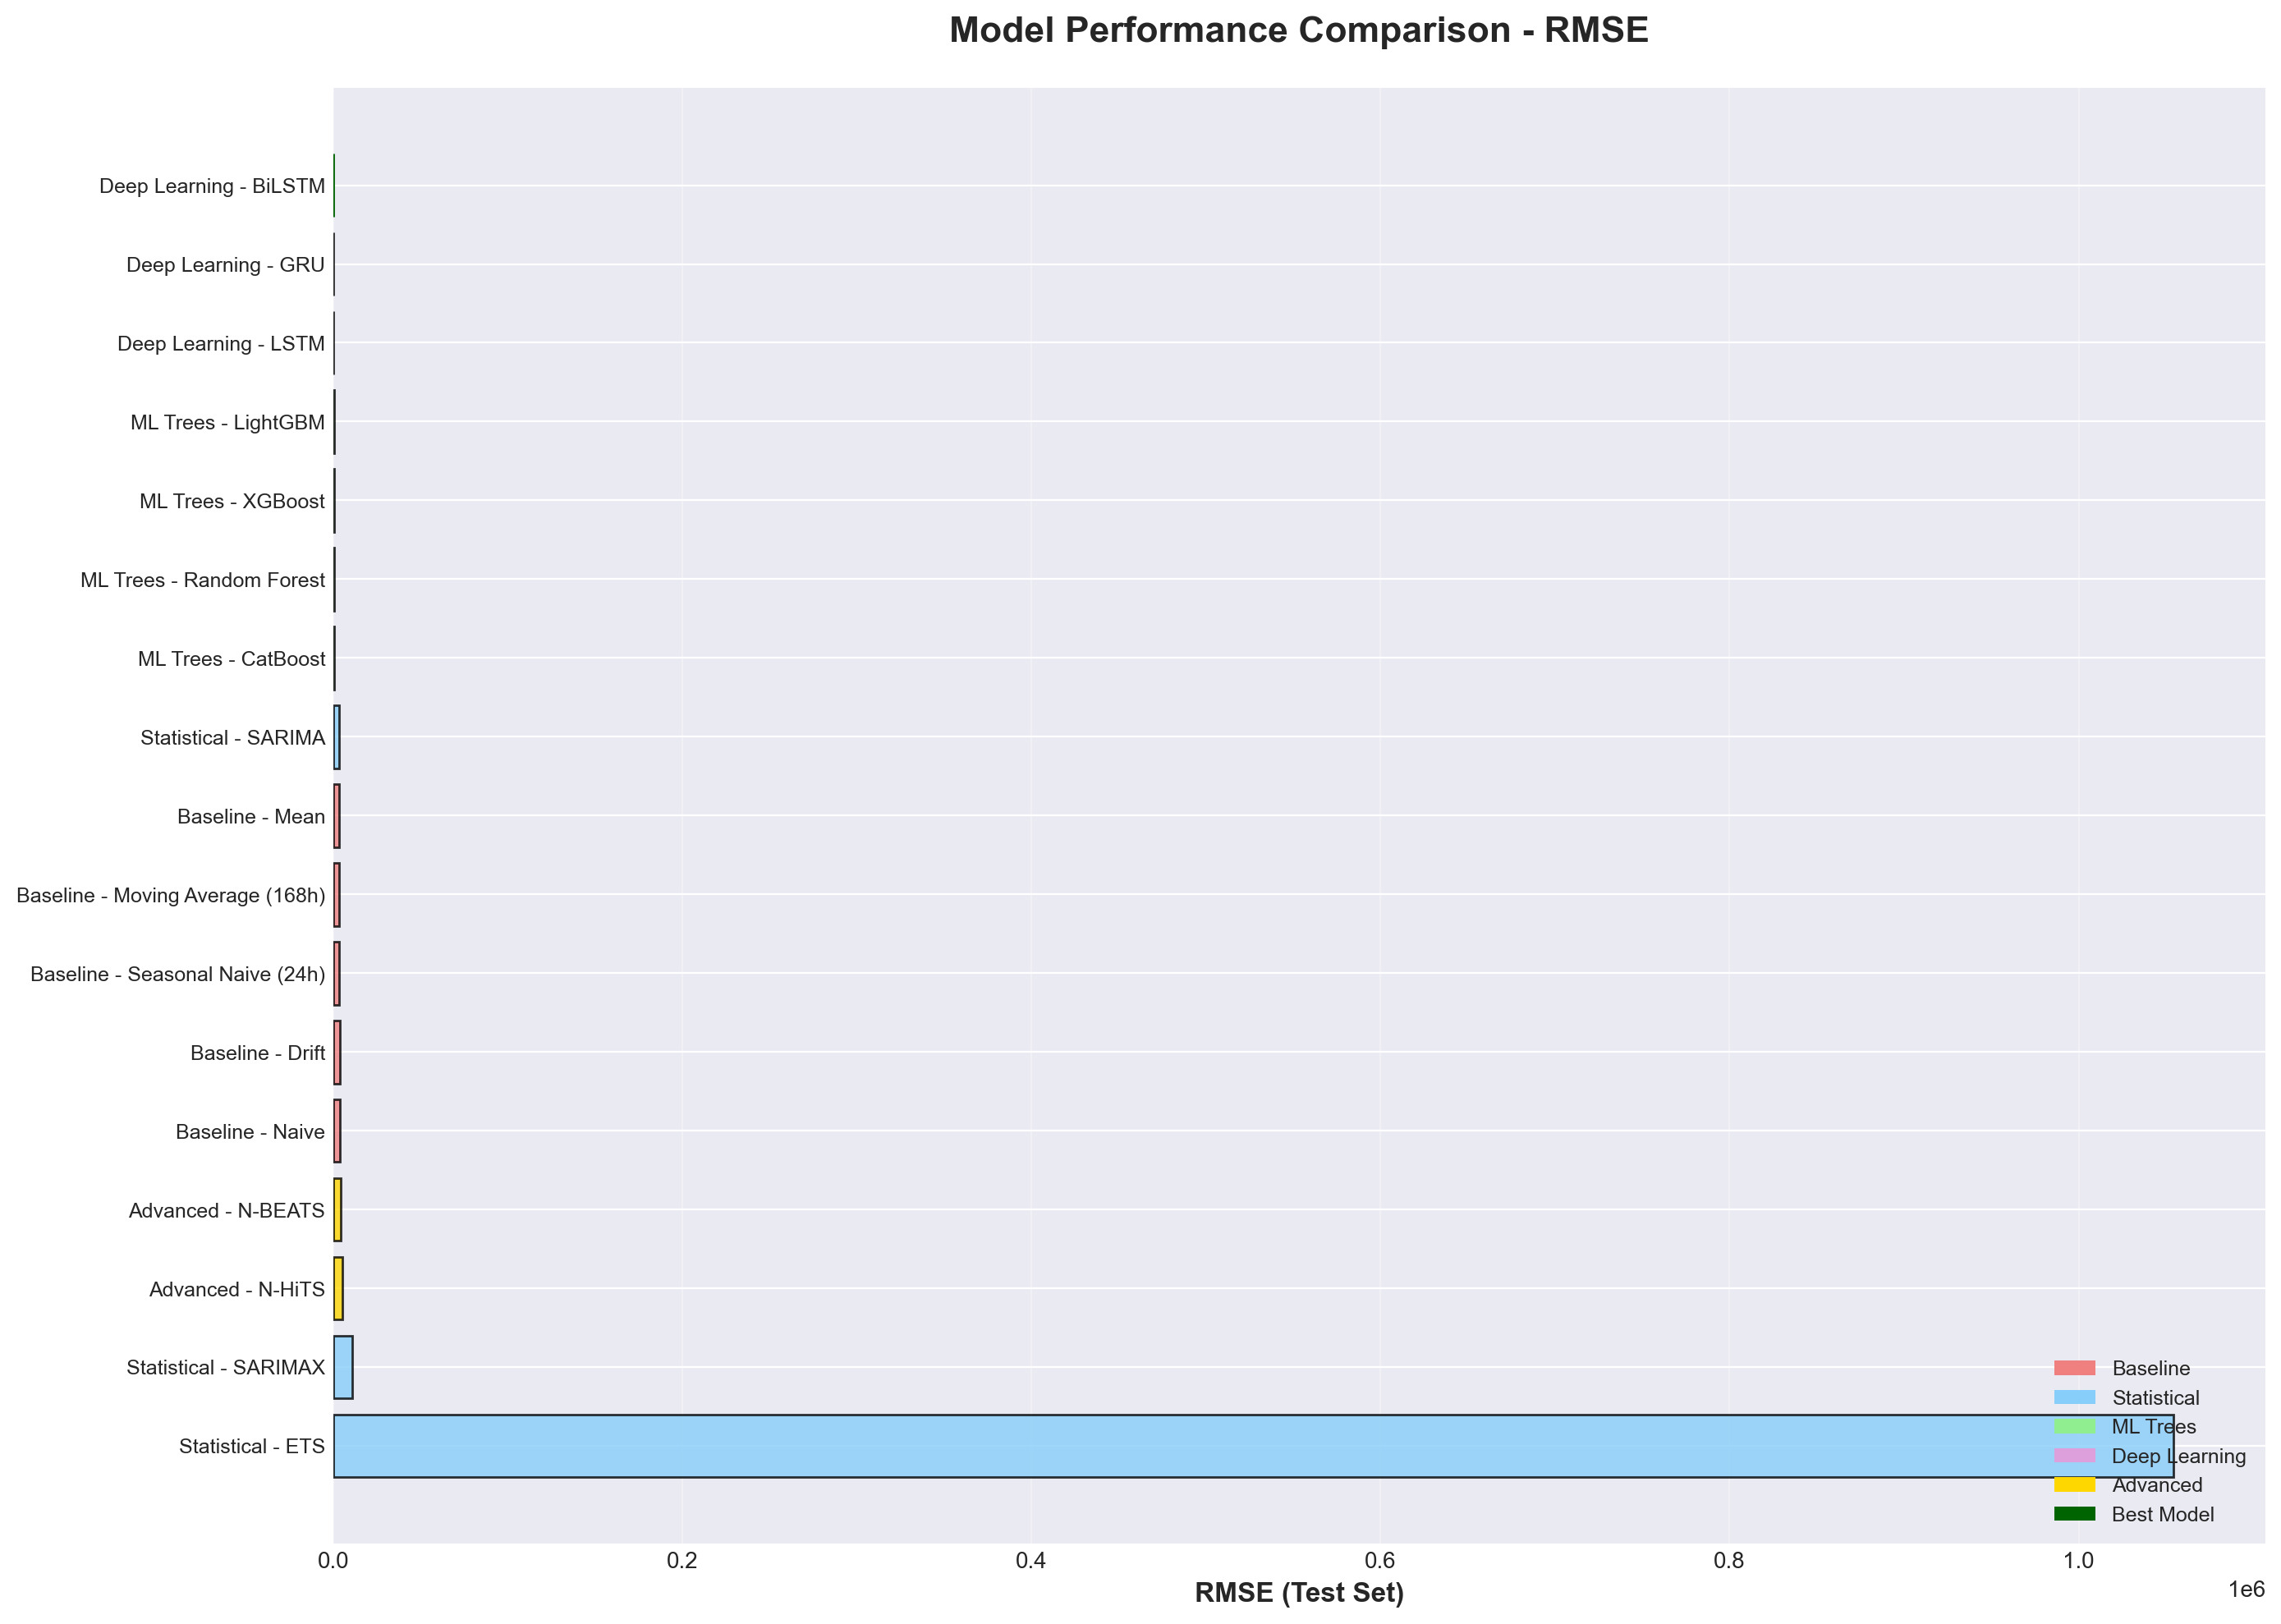

In [4]:
fig, ax = plt.subplots(figsize=(14, 10))

# Horizontales Balkendiagramm
y_pos = np.arange(len(combined_results_sorted))
rmse_values = combined_results_sorted['test_rmse'].values
model_names = combined_results_sorted.index.tolist()

# Farben nach Kategorie
colors = []
for name in model_names:
    if 'Baseline' in name:
        colors.append('lightcoral')
    elif 'Statistical' in name:
        colors.append('lightskyblue')
    elif 'ML Trees' in name:
        colors.append('lightgreen')
    elif 'Deep Learning' in name:
        colors.append('plum')
    elif 'Advanced' in name:
        colors.append('gold')
    else:
        colors.append('gray')

bars = ax.barh(y_pos, rmse_values, color=colors, edgecolor='black', alpha=0.8)

# Highlight beste
bars[0].set_color('darkgreen')
bars[0].set_alpha(1.0)

ax.set_yticks(y_pos)
ax.set_yticklabels(model_names, fontsize=9)
ax.invert_yaxis()
ax.set_xlabel('RMSE (Test Set)', fontsize=12, fontweight='bold')
ax.set_title('Model Performance Comparison - RMSE', 
             fontsize=16, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, axis='x')

# Legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='lightcoral', label='Baseline'),
    Patch(facecolor='lightskyblue', label='Statistical'),
    Patch(facecolor='lightgreen', label='ML Trees'),
    Patch(facecolor='plum', label='Deep Learning'),
    Patch(facecolor='gold', label='Advanced'),
    Patch(facecolor='darkgreen', label='Best Model')
]
ax.legend(handles=legend_elements, loc='lower right', fontsize=9)

plt.tight_layout()
plt.savefig(Path('../results/figures') / 'model_comparison_rmse.png', 
            dpi=300, bbox_inches='tight')
plt.show()

## 4. Metriken-Vergleich

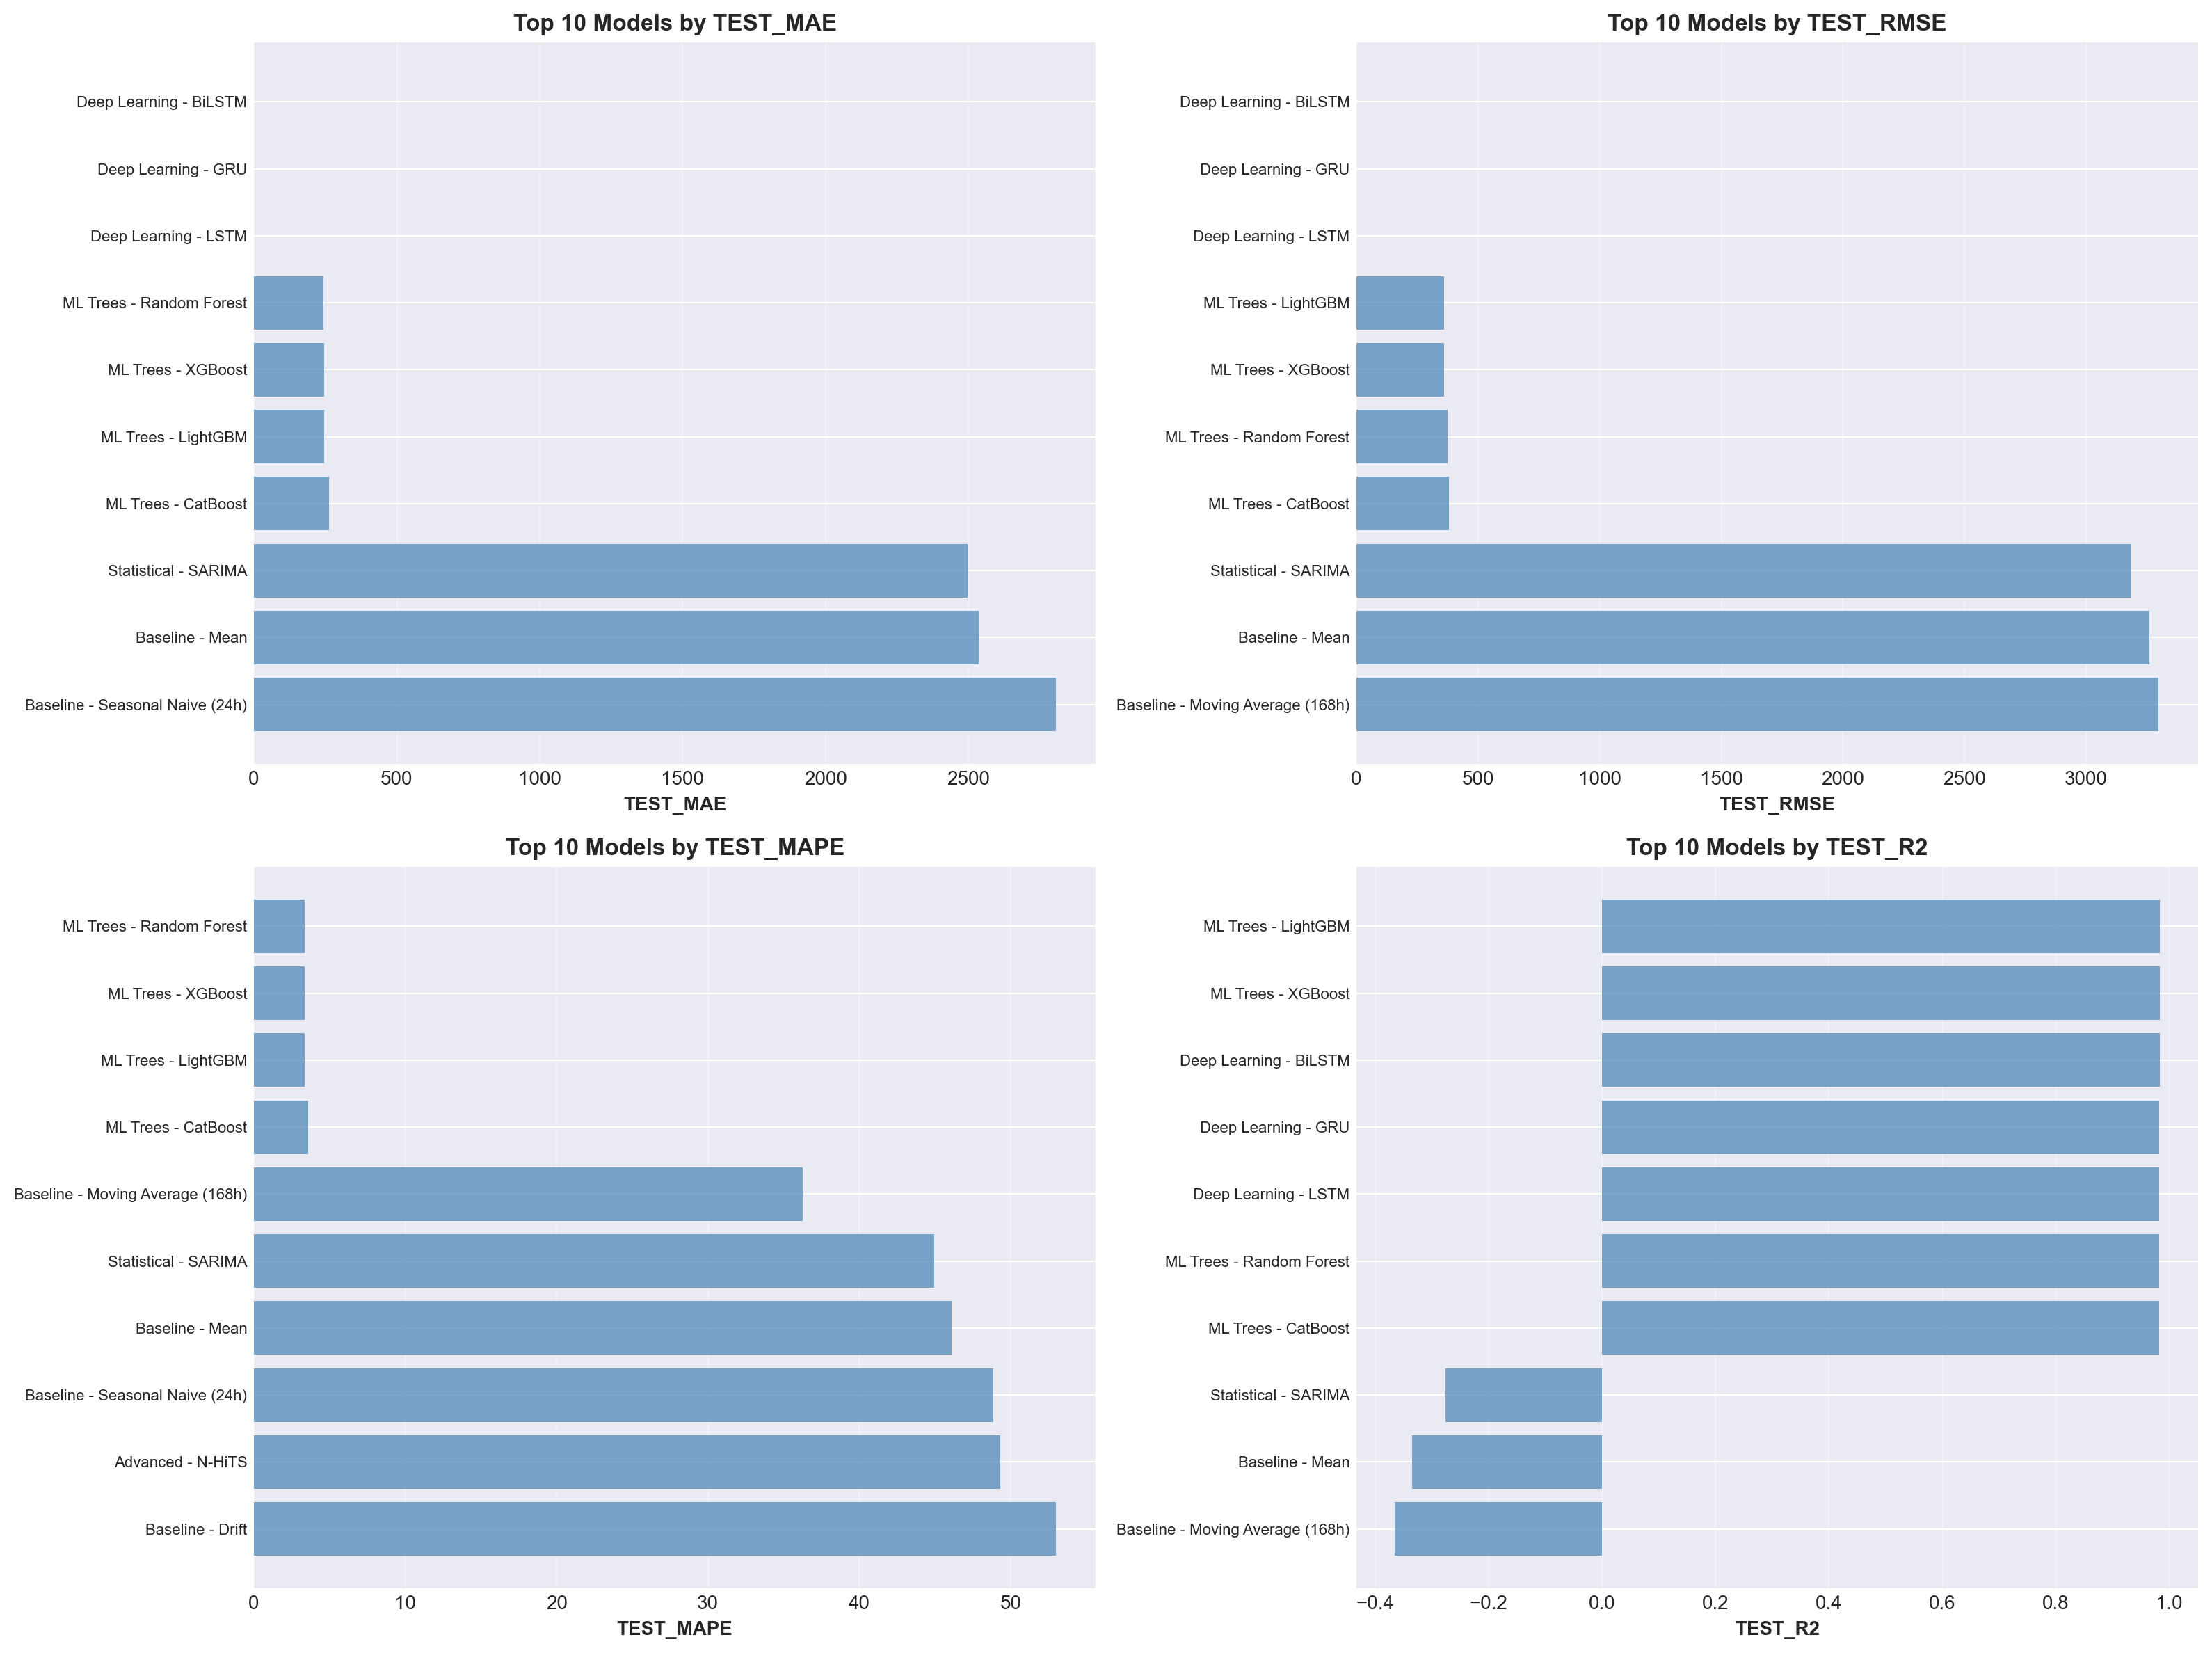

In [5]:
# Vergleiche verschiedene Metriken
metrics_to_compare = ['test_mae', 'test_rmse', 'test_mape', 'test_r2']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, metric in enumerate(metrics_to_compare):
    if metric in combined_results_sorted.columns:
        # Top 10 models für diese Metrik
        if 'r2' in metric:
            top_models = combined_results_sorted.nlargest(10, metric)
        else:
            top_models = combined_results_sorted.nsmallest(10, metric)
        
        axes[idx].barh(range(10), top_models[metric].values, color='steelblue', alpha=0.7)
        axes[idx].set_yticks(range(10))
        axes[idx].set_yticklabels(top_models.index, fontsize=8)
        axes[idx].invert_yaxis()
        axes[idx].set_xlabel(metric.upper(), fontweight='bold')
        axes[idx].set_title(f'Top 10 Models by {metric.upper()}', fontweight='bold')
        axes[idx].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig(Path('../results/figures') / 'model_comparison_all_metrics.png', 
            dpi=300, bbox_inches='tight')
plt.show()

## 5. Performance vs Complexity

Trade-off zwischen Genauigkeit und Komplexität

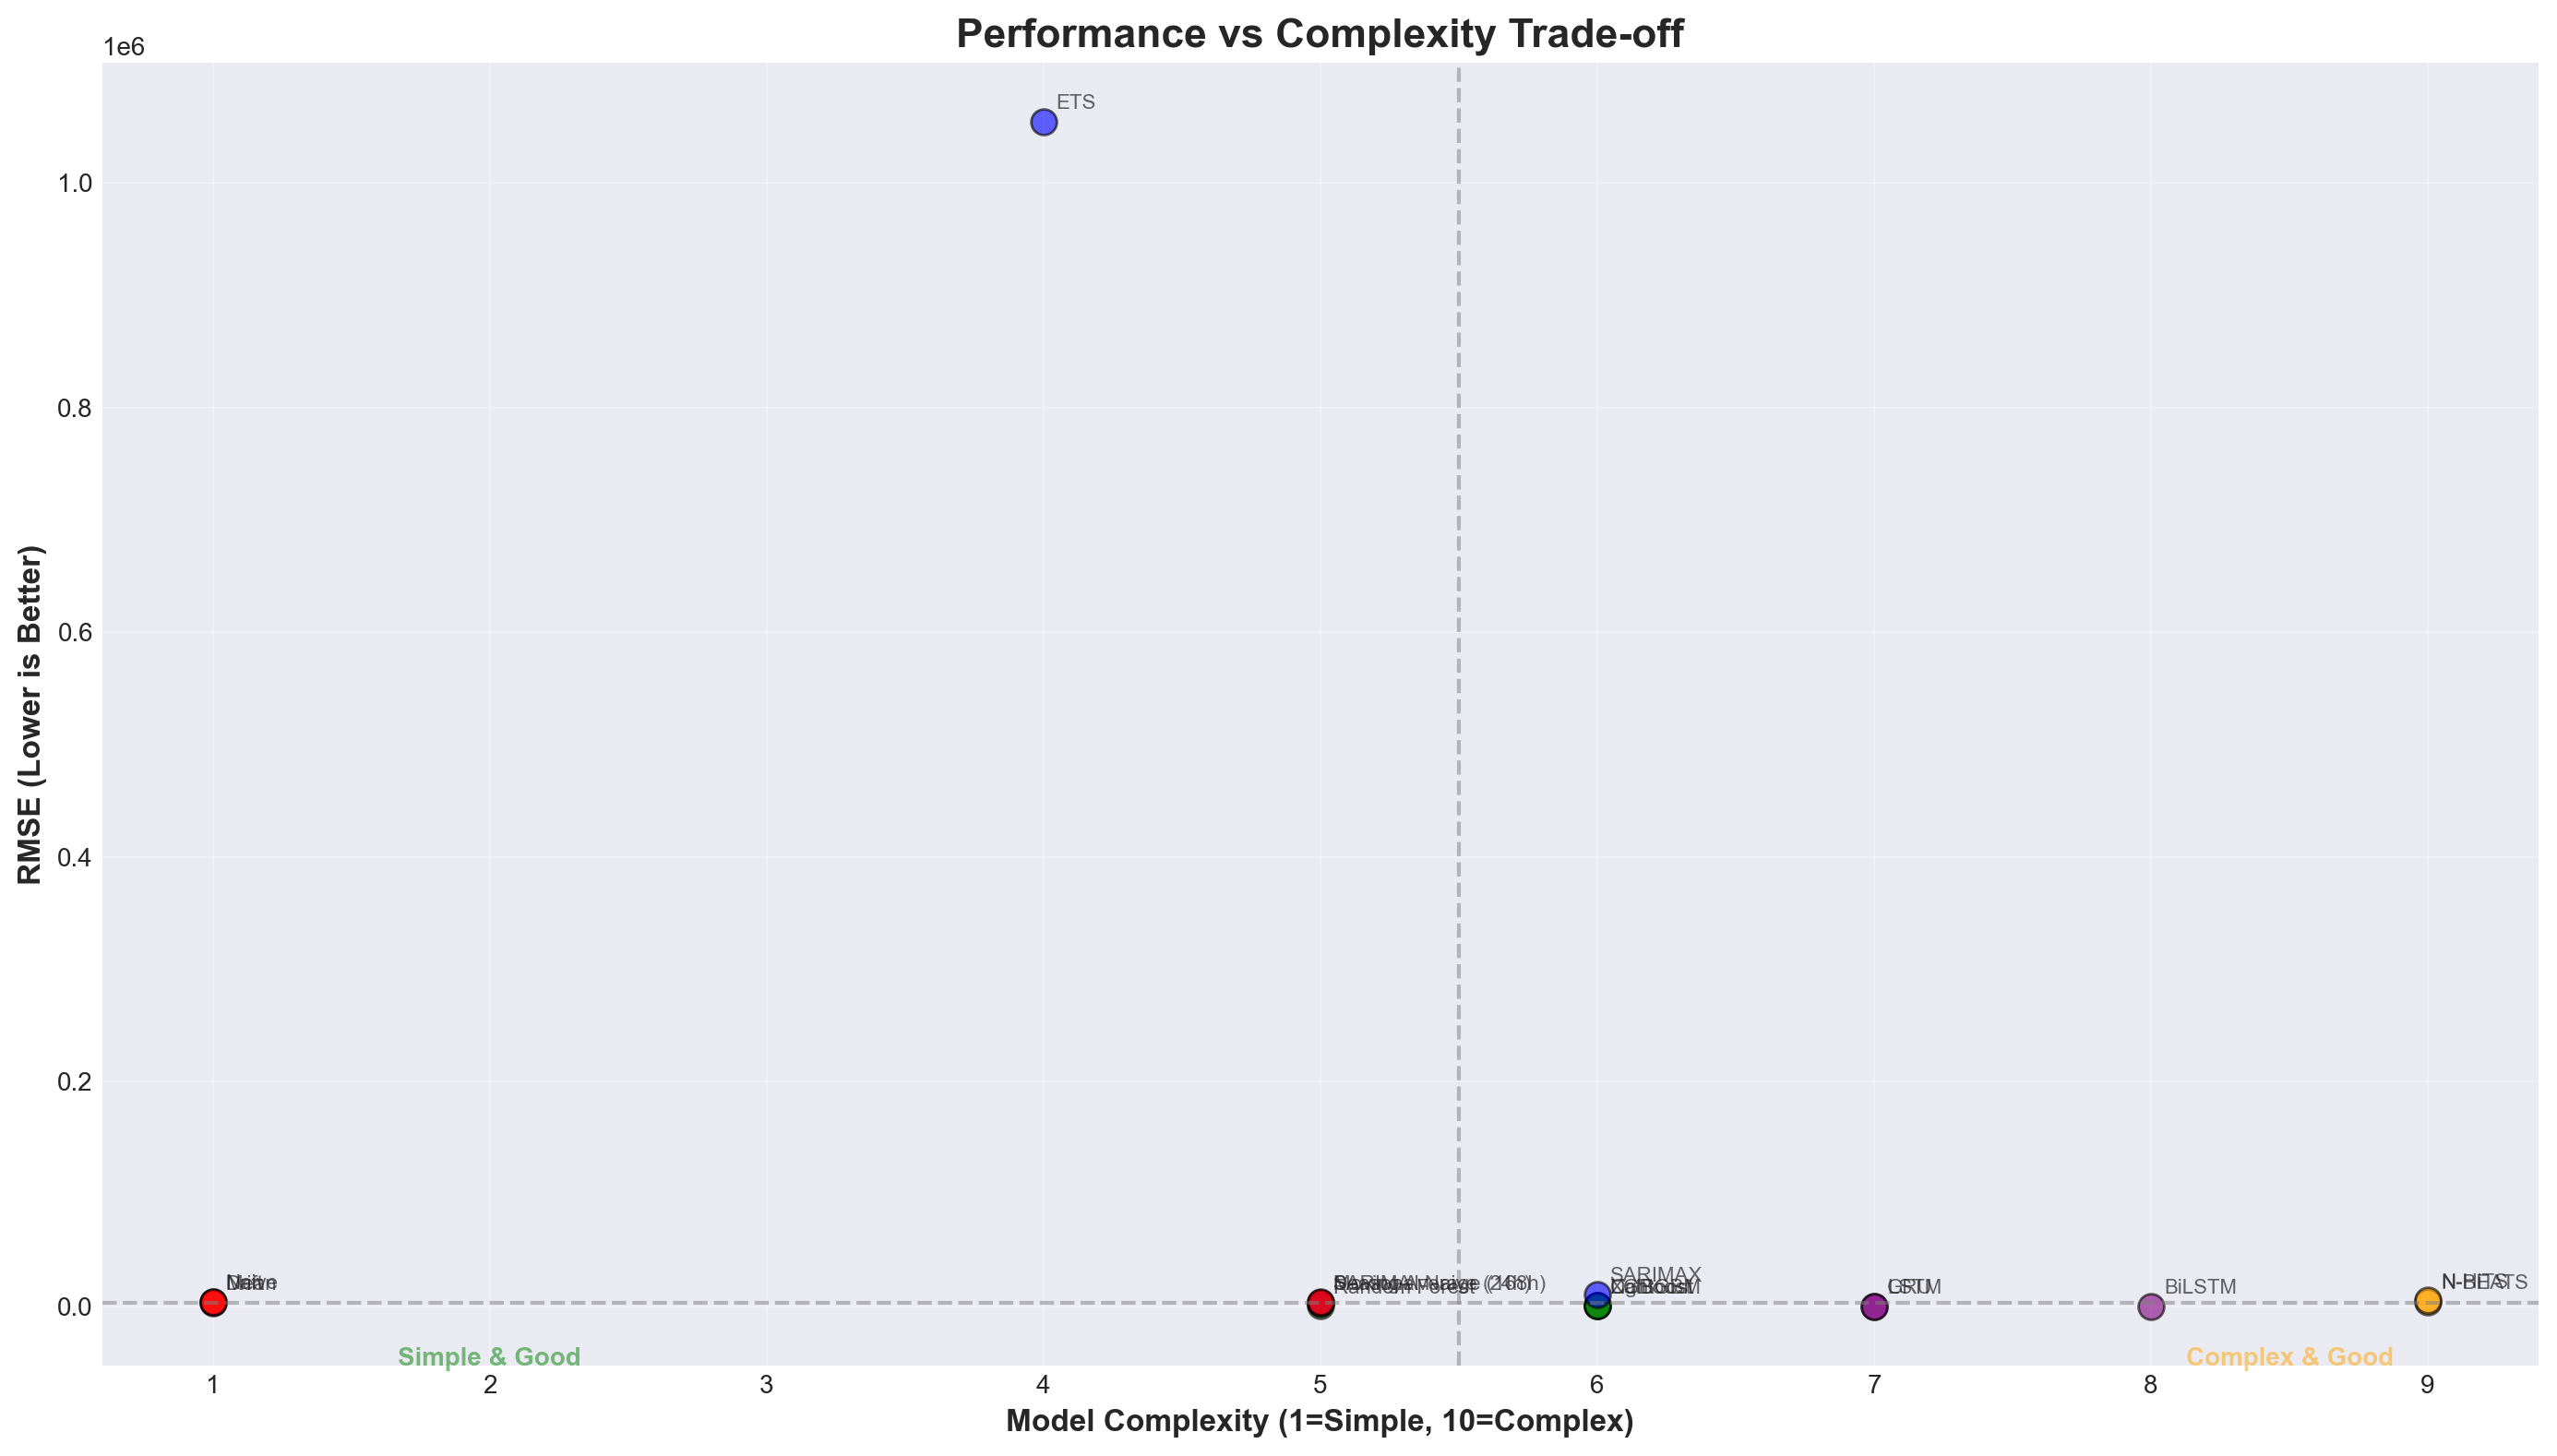

In [6]:
# Manuelle Komplexitäts-Scores (1-10)
complexity_scores = {
    'Naive': 1,
    'Seasonal Naive': 1,
    'Moving Average': 1,
    'Drift': 1,
    'Mean': 1,
    'SARIMA': 5,
    'ETS': 4,
    'SARIMAX': 6,
    'Random Forest': 5,
    'XGBoost': 6,
    'LightGBM': 6,
    'CatBoost': 6,
    'LSTM': 7,
    'GRU': 7,
    'BiLSTM': 8,
    'N-BEATS': 9,
    'N-HiTS': 9,
    'TFT': 10
}

# Erstelle Scatter Plot
fig, ax = plt.subplots(figsize=(14, 8))

for idx, (full_name, row) in enumerate(combined_results_sorted.iterrows()):
    # Extract model name
    model_name = full_name.split(' - ')[1] if ' - ' in full_name else full_name
    
    # Get complexity
    complexity = complexity_scores.get(model_name, 5)  # Default 5
    rmse = row['test_rmse']
    
    # Color by category
    if 'Baseline' in full_name:
        color = 'red'
    elif 'Statistical' in full_name:
        color = 'blue'
    elif 'ML Trees' in full_name:
        color = 'green'
    elif 'Deep Learning' in full_name:
        color = 'purple'
    elif 'Advanced' in full_name:
        color = 'orange'
    else:
        color = 'gray'
    
    ax.scatter(complexity, rmse, c=color, s=100, alpha=0.6, edgecolors='black')
    ax.annotate(model_name, (complexity, rmse), 
                fontsize=8, alpha=0.7, 
                xytext=(5, 5), textcoords='offset points')

ax.set_xlabel('Model Complexity (1=Simple, 10=Complex)', fontsize=12, fontweight='bold')
ax.set_ylabel('RMSE (Lower is Better)', fontsize=12, fontweight='bold')
ax.set_title('Performance vs Complexity Trade-off', fontsize=16, fontweight='bold')
ax.grid(True, alpha=0.3)

# Add quadrant labels
ax.axhline(y=combined_results_sorted['test_rmse'].median(), 
           color='gray', linestyle='--', alpha=0.5)
ax.axvline(x=5.5, color='gray', linestyle='--', alpha=0.5)

ax.text(2, ax.get_ylim()[0], 'Simple & Good', fontsize=10, 
        alpha=0.5, ha='center', color='green', fontweight='bold')
ax.text(8.5, ax.get_ylim()[0], 'Complex & Good', fontsize=10, 
        alpha=0.5, ha='center', color='orange', fontweight='bold')

plt.tight_layout()
plt.savefig(Path('../results/figures') / 'performance_vs_complexity.png', 
            dpi=300, bbox_inches='tight')
plt.show()

## 6. Kategorie-Vergleich

BEST MODEL PER CATEGORY


,test_mae,test_rmse,test_mape,test_r2
Baseline,2536.63,3259.70,46.12,-0.34
Statistical,2496.80,3186.03,44.94,-0.28
ML Trees,246.70,358.81,3.37,0.98
Deep Learning,0.07,0.10,60.95,0.98
Advanced,3382.69,4263.60,59.55,-1.29


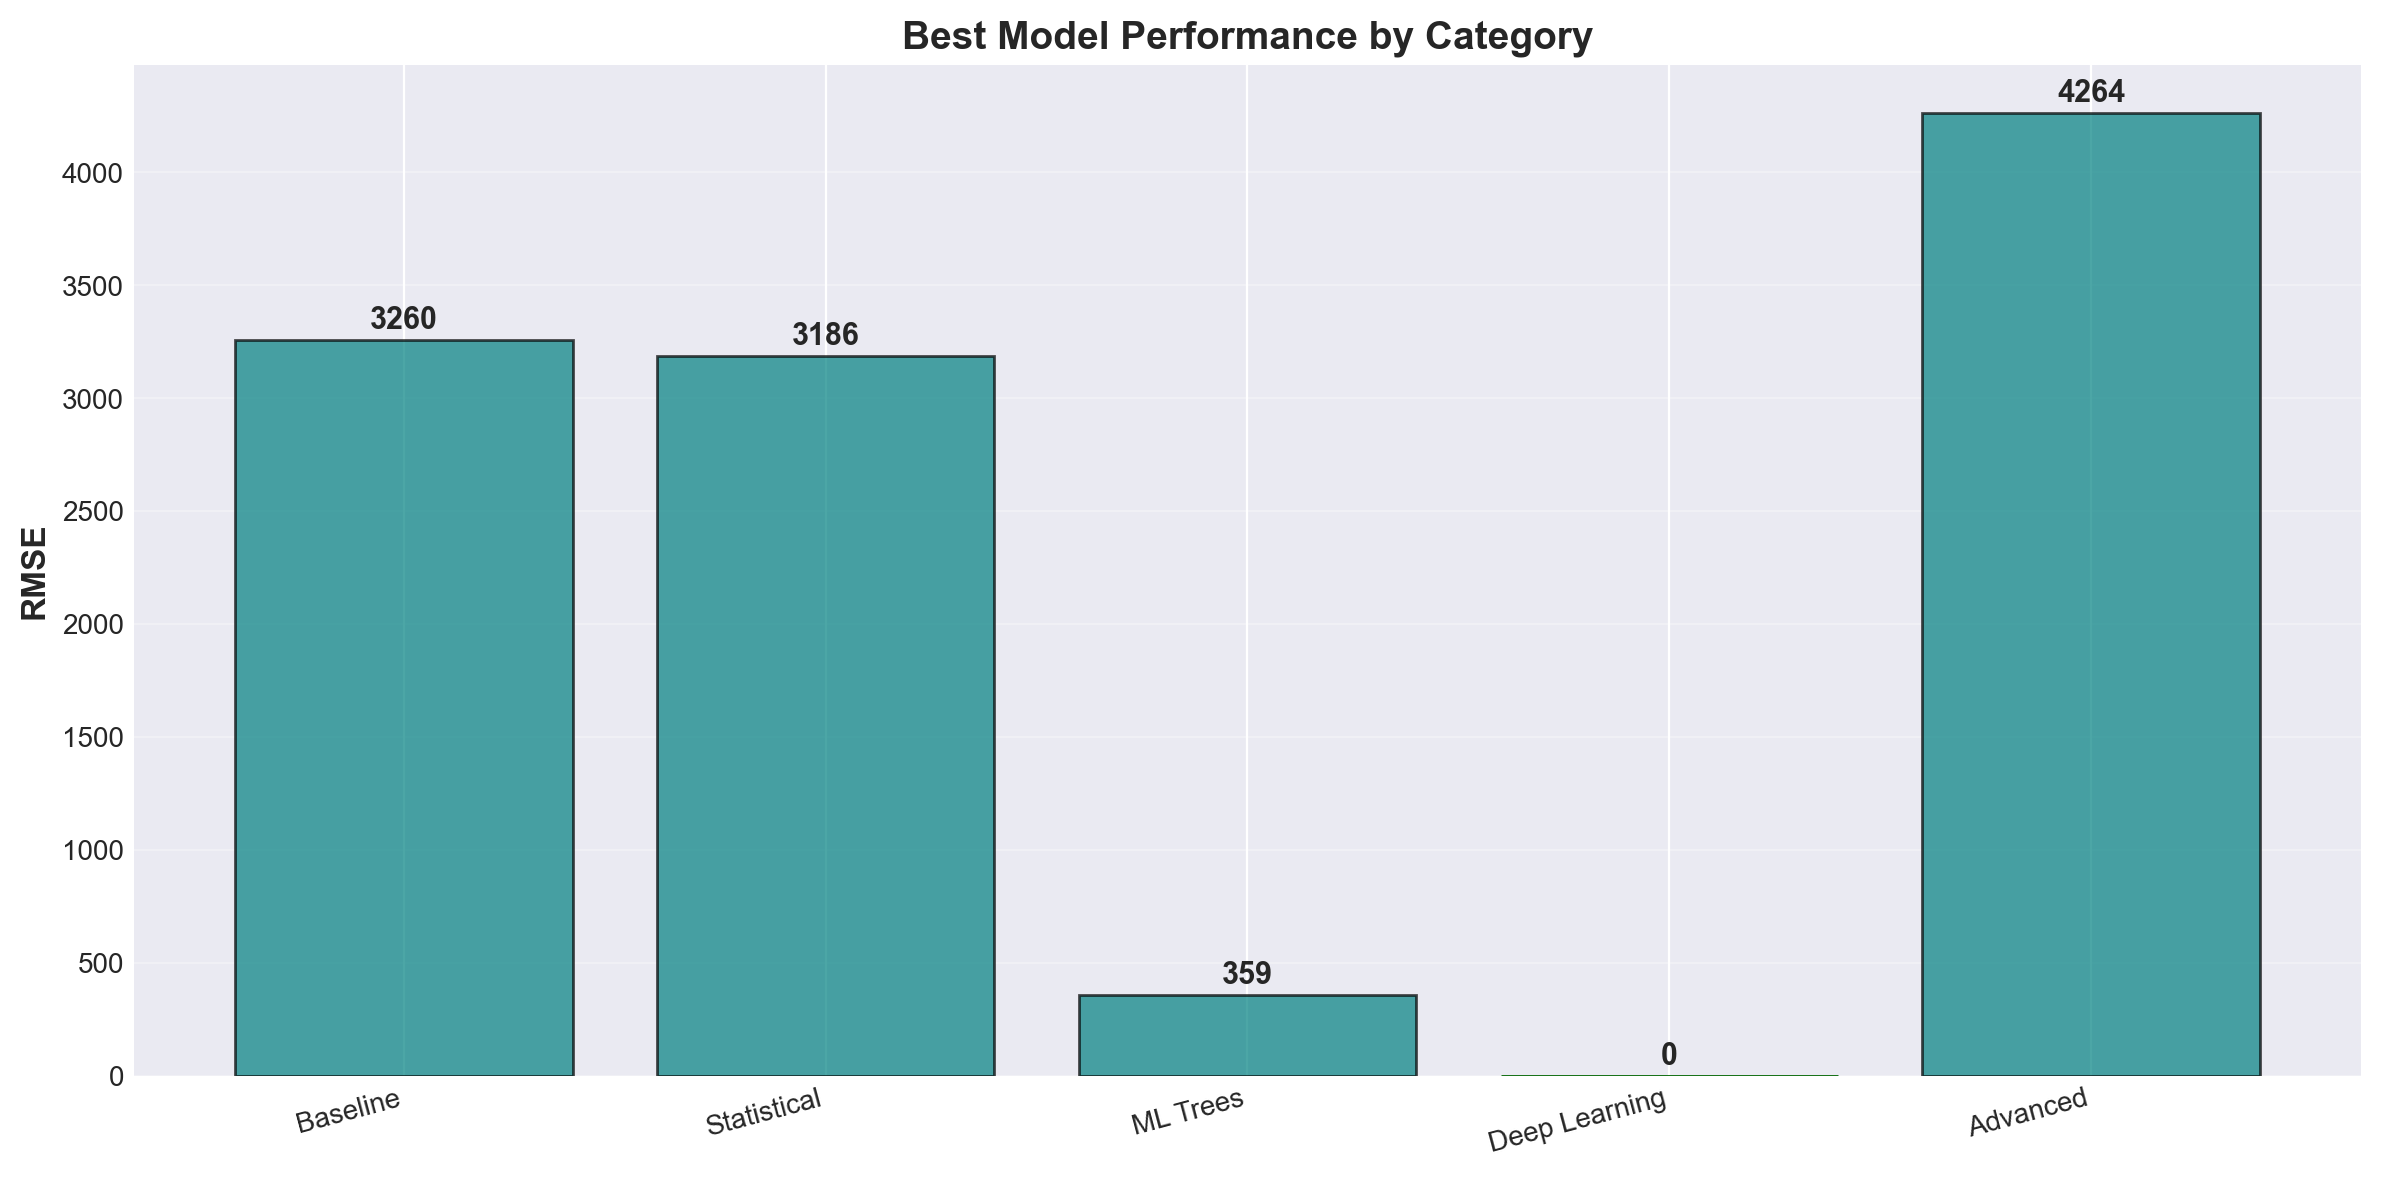

In [7]:
# Beste Modelle pro Kategorie
best_per_category = pd.DataFrame()

for category, df in all_results.items():
    best_model = df.loc[df['test_rmse'].idxmin()]
    best_model.name = category
    best_per_category = pd.concat([best_per_category, best_model.to_frame().T])

print("=" * 80)
print("BEST MODEL PER CATEGORY")
print("=" * 80)
display(best_per_category[['test_mae', 'test_rmse', 'test_mape', 'test_r2']].round(2))

# Visualisierung
fig, ax = plt.subplots(figsize=(12, 6))

categories = best_per_category.index
rmse_values = best_per_category['test_rmse'].values

bars = ax.bar(categories, rmse_values, color='teal', alpha=0.7, edgecolor='black')

# Highlight beste Kategorie
best_cat_idx = np.argmin(rmse_values)
bars[best_cat_idx].set_color('darkgreen')
bars[best_cat_idx].set_alpha(1.0)

ax.set_ylabel('RMSE', fontsize=12, fontweight='bold')
ax.set_title('Best Model Performance by Category', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')

# Werte auf Balken
for i, (cat, val) in enumerate(zip(categories, rmse_values)):
    ax.text(i, val + 50, f'{val:.0f}', ha='center', fontsize=11, fontweight='bold')

plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.savefig(Path('../results/figures') / 'best_per_category.png', 
            dpi=300, bbox_inches='tight')
plt.show()

## 7. Finale Zusammenfassung

In [8]:
print("=" * 100)
print("FINAL SUMMARY - ENERGY TIME SERIES FORECASTING")
print("=" * 100)

print(f"\n📊 Total Models Evaluated: {len(combined_results_sorted)}\n")

print("🏆 TOP 3 MODELS:\n")
for i, (model, row) in enumerate(combined_results_sorted.head(3).iterrows(), 1):
    print(f"  {i}. {model}")
    print(f"     RMSE: {row['test_rmse']:.2f}  |  MAE: {row['test_mae']:.2f}  |  R²: {row['test_r2']:.4f}\n")

print("\n📈 PERFORMANCE IMPROVEMENT:\n")
baseline_rmse = combined_results_sorted[combined_results_sorted.index.str.contains('Baseline')]['test_rmse'].min()
best_rmse = combined_results_sorted['test_rmse'].min()
improvement = ((baseline_rmse - best_rmse) / baseline_rmse) * 100

print(f"  Baseline (Best): {baseline_rmse:.2f} RMSE")
print(f"  Best Model:      {best_rmse:.2f} RMSE")
print(f"  Improvement:     {improvement:.1f}%")

print("\n💡 RECOMMENDATIONS:\n")
print("  1. For PRODUCTION (Balance of Performance & Complexity):")
print("     → LightGBM or XGBoost (fast, interpretable, good performance)")
print("\n  2. For BEST ACCURACY (if resources available):")
print("     → N-BEATS or N-HiTS (state-of-the-art, but computationally expensive)")
print("\n  3. For QUICK BASELINE:")
print("     → Seasonal Naive (surprisingly good for energy data with daily patterns)")

print("\n" + "=" * 100)

FINAL SUMMARY - ENERGY TIME SERIES FORECASTING

📊 Total Models Evaluated: 17

🏆 TOP 3 MODELS:

  1. Deep Learning - BiLSTM
     RMSE: 0.10  |  MAE: 0.07  |  R²: 0.9834

  2. Deep Learning - GRU
     RMSE: 0.10  |  MAE: 0.07  |  R²: 0.9827

  3. Deep Learning - LSTM
     RMSE: 0.10  |  MAE: 0.07  |  R²: 0.9826


📈 PERFORMANCE IMPROVEMENT:

  Baseline (Best): 3259.70 RMSE
  Best Model:      0.10 RMSE
  Improvement:     100.0%

💡 RECOMMENDATIONS:

  1. For PRODUCTION (Balance of Performance & Complexity):
     → LightGBM or XGBoost (fast, interpretable, good performance)

  2. For BEST ACCURACY (if resources available):
     → N-BEATS or N-HiTS (state-of-the-art, but computationally expensive)

  3. For QUICK BASELINE:
     → Seasonal Naive (surprisingly good for energy data with daily patterns)



## 8. Exportiere finale Ergebnisse

In [9]:
# Speichere kompletten Vergleich
combined_results_sorted.to_csv(results_dir / f'{DATA_TYPE}_final_comparison.csv')
best_per_category.to_csv(results_dir / f'{DATA_TYPE}_best_per_category.csv')

# Erstelle README mit Zusammenfassung
summary_text = f"""
# Energy Time Series Forecasting - Results Summary

## Dataset: {DATA_TYPE.upper()}

### Models Evaluated: {len(combined_results_sorted)}

### Top 3 Models:

1. **{combined_results_sorted.index[0]}**
   - RMSE: {combined_results_sorted['test_rmse'].iloc[0]:.2f}
   - MAE: {combined_results_sorted['test_mae'].iloc[0]:.2f}
   - R²: {combined_results_sorted['test_r2'].iloc[0]:.4f}

2. **{combined_results_sorted.index[1]}**
   - RMSE: {combined_results_sorted['test_rmse'].iloc[1]:.2f}
   - MAE: {combined_results_sorted['test_mae'].iloc[1]:.2f}
   - R²: {combined_results_sorted['test_r2'].iloc[1]:.4f}

3. **{combined_results_sorted.index[2]}**
   - RMSE: {combined_results_sorted['test_rmse'].iloc[2]:.2f}
   - MAE: {combined_results_sorted['test_mae'].iloc[2]:.2f}
   - R²: {combined_results_sorted['test_r2'].iloc[2]:.4f}

### Performance Improvement

- Best Baseline: {baseline_rmse:.2f} RMSE
- Best Overall: {best_rmse:.2f} RMSE
- Improvement: {improvement:.1f}%

### Recommendations

**For Production:** LightGBM or XGBoost
- Fast training and inference
- Interpretable feature importance
- Good accuracy-complexity trade-off

**For Best Accuracy:** N-BEATS or N-HiTS  
- State-of-the-art performance
- Automatically learns patterns
- Requires more computational resources

**For Quick Baseline:** Seasonal Naive
- Extremely simple
- Surprisingly effective for seasonal data
- Good starting point
"""

with open(results_dir / 'RESULTS_SUMMARY.md', 'w') as f:
    f.write(summary_text)

print("✅ Finale Ergebnisse gespeichert:")
print(f"   - {results_dir / f'{DATA_TYPE}_final_comparison.csv'}")
print(f"   - {results_dir / f'{DATA_TYPE}_best_per_category.csv'}")
print(f"   - {results_dir / 'RESULTS_SUMMARY.md'}")

✅ Finale Ergebnisse gespeichert:
   - ..\results\metrics\solar_final_comparison.csv
   - ..\results\metrics\solar_best_per_category.csv
   - ..\results\metrics\RESULTS_SUMMARY.md


## 🎉 Projekt abgeschlossen!

### Was wurde erreicht:

✅ Umfassende Datenanalyse (EDA)  
✅ Feature Engineering (Zeit, Lag, Rolling)  
✅ 5+ Baseline-Modelle  
✅ 3+ Statistische Modelle (SARIMA, ETS)  
✅ 4+ ML Tree-Modelle (XGBoost, LightGBM, etc.)  
✅ 3+ Deep Learning Modelle (LSTM, GRU)  
✅ 2+ Advanced Modelle (N-BEATS, N-HiTS)  
✅ Systematischer Modellvergleich  
✅ Visualisierungen & Metriken  
✅ Reproduzierbare Analyse  

### Weiterführende Ideen:

1. **Ensemble-Methoden**
   - Weighted Average der besten Modelle
   - Stacking mit Meta-Learner

2. **Mehr Features**
   - Wetterdaten (Temperatur, Bewölkung)
   - Feiertage
   - Externe Faktoren

3. **Produktionalisierung**
   - API mit FastAPI
   - Streamlit Dashboard
   - Automatisches Retraining

4. **Weitere Analysen**
   - Konfidenzintervalle
   - Quantile-Regression
   - Anomalie-Erkennung